In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 设置 Matplotlib 和 Seaborn 的样式
plt.style.use('ggplot') # 使用 ggplot 风格，可选
sns.set_theme(style="whitegrid") # 设置 seaborn 主题

In [38]:
# 加载数据
# 尝试从本地加载，如果文件不存在，则从seaborn加载示例数据集
df = pd.read_csv('/home/hmd24/project/TOC_Warning_System/data/processed/TOC_dataset_original_shift.csv')
print("数据加载成功！")

数据加载成功！


In [39]:
# 1. 确保 'timestamp' 列是 datetime 类型，并设置为索引
# 假设您的时间戳列名为 'timestamp'
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
print("数据加载并设置时间戳为索引成功！")

# 2. 初步检查
print("\n--- 2.1 数据集的头部（前5行）---")
print(df.head())

print("\n--- 2.2 数据集的尾部（后5行）---")
print(df.tail())

print("\n--- 2.3 数据集的基本信息（非空值、数据类型）---")
df.info()

print("\n--- 2.4 数据集的统计摘要（数值型特征）---")
print(df.describe())

print("\n--- 2.5 数据集的形状（行数, 列数）---")
print(f"数据集的形状：{df.shape}")

print("\n--- 2.6 每列的缺失值数量 ---")
print(df.isnull().sum())

print("\n--- 2.7 每列缺失值的百分比 ---")
print((df.isnull().sum() / len(df)) * 100)

print("\n--- 2.8 时间戳连续性检查 ---")
time_diff = df.index.to_series().diff()
# 检查时间步长是否一致
print(f"最小时间步长: {time_diff.min()}")
print(f"最大时间步长: {time_diff.max()}")
print(f"平均时间步长: {time_diff.mean()}")

# 如果时间步长不一致，可以找出不连续的点
if not (time_diff.max() == time_diff.min()):
    print("注意：时间戳存在不连续点或非均匀采样。")
    # 进一步找出具体的跳变点：
    # print(time_diff[time_diff != time_diff.mode()[0]]) # 找出和众数时间步长不一样的点

数据加载并设置时间戳为索引成功！

--- 2.1 数据集的头部（前5行）---
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2024-01-27 18:00:00  1.38  31.25  20.42  3.27  1.86      0.55
2024-01-27 19:00:00  1.33  31.25  21.12  3.26  1.87      0.55
2024-01-27 20:00:00  1.27  31.25  20.81  3.25  1.87      0.55
2024-01-27 21:00:00  1.22  31.25  20.49  3.24  1.87      0.55
2024-01-27 22:00:00  1.24  31.25  20.18  3.21  1.88      0.55

--- 2.2 数据集的尾部（后5行）---
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2025-03-18 11:00:00  3.16  47.47  20.31  4.89  2.02      0.63
2025-03-18 12:00:00  3.18  47.73  18.91  4.78  2.01      0.63
2025-03-18 13:00:00  3.20  48.00  17.51  4.66  2.01      0.63
2025-03-18 14:00:00  3.23  49.25  18.72  4.54  2.00      0.63
2025-03-18 15:00:00  3.25  50.50  19.92  4.43  1.99      0.63

--- 2.3 数据集的基本信息（非空值、数据类型）---
<class 'pandas.core.frame.DataFrame'


--- 3.1 时序数据可视化 (线图) ---


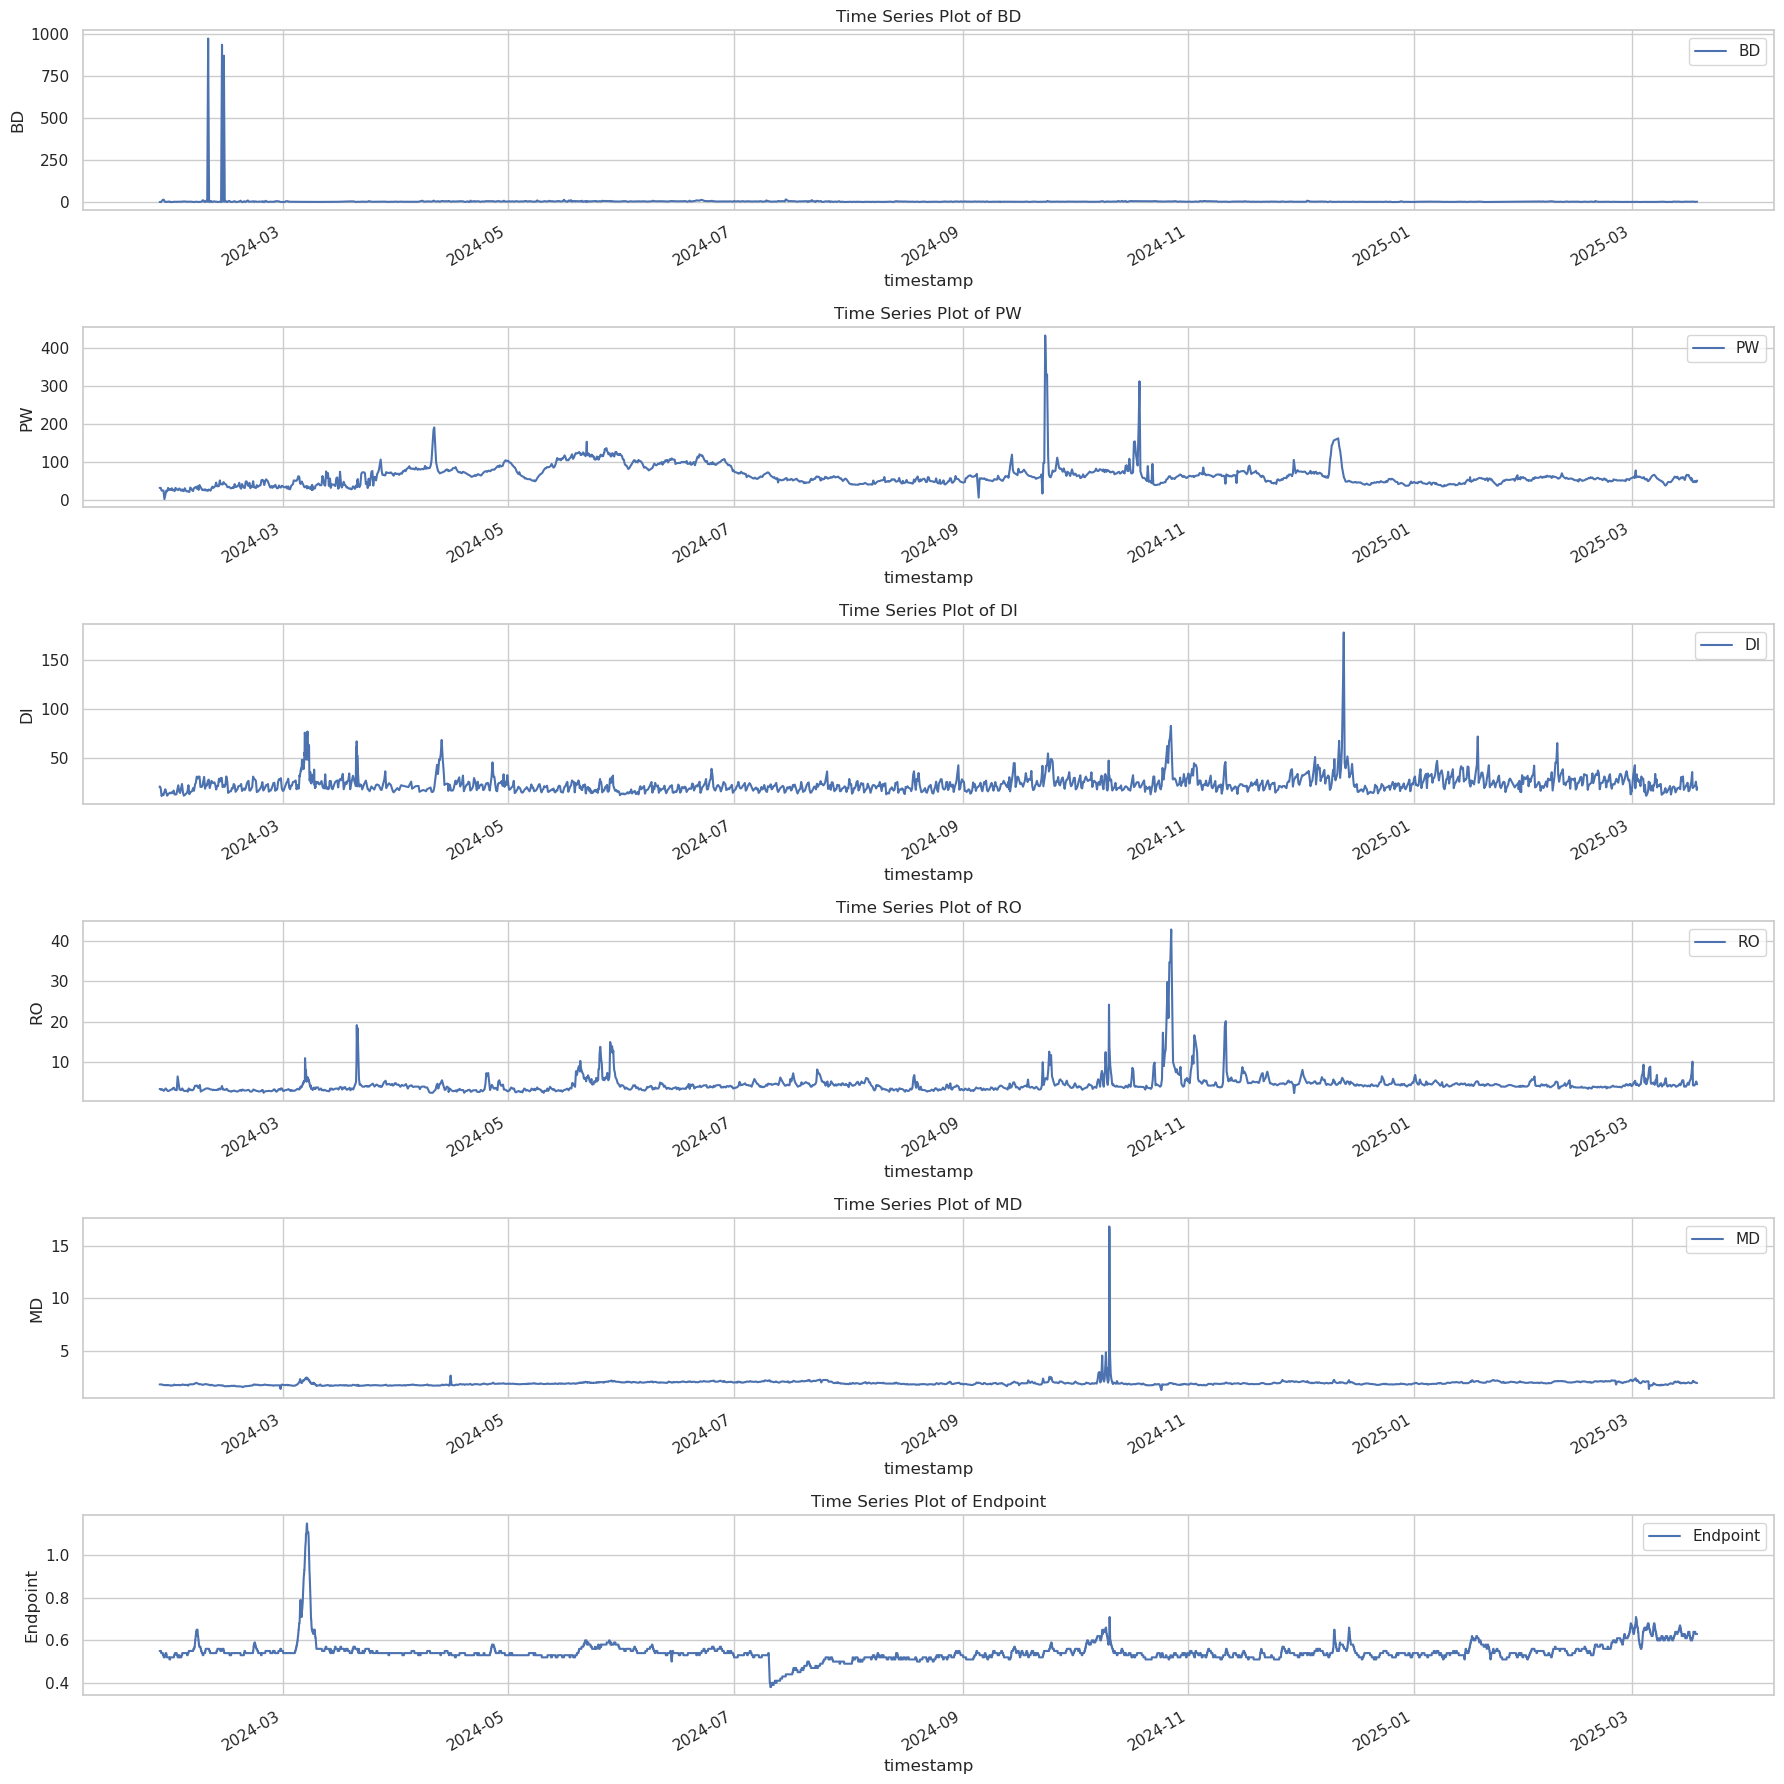


--- 3.2 单变量分布分析 (直方图和箱线图) ---


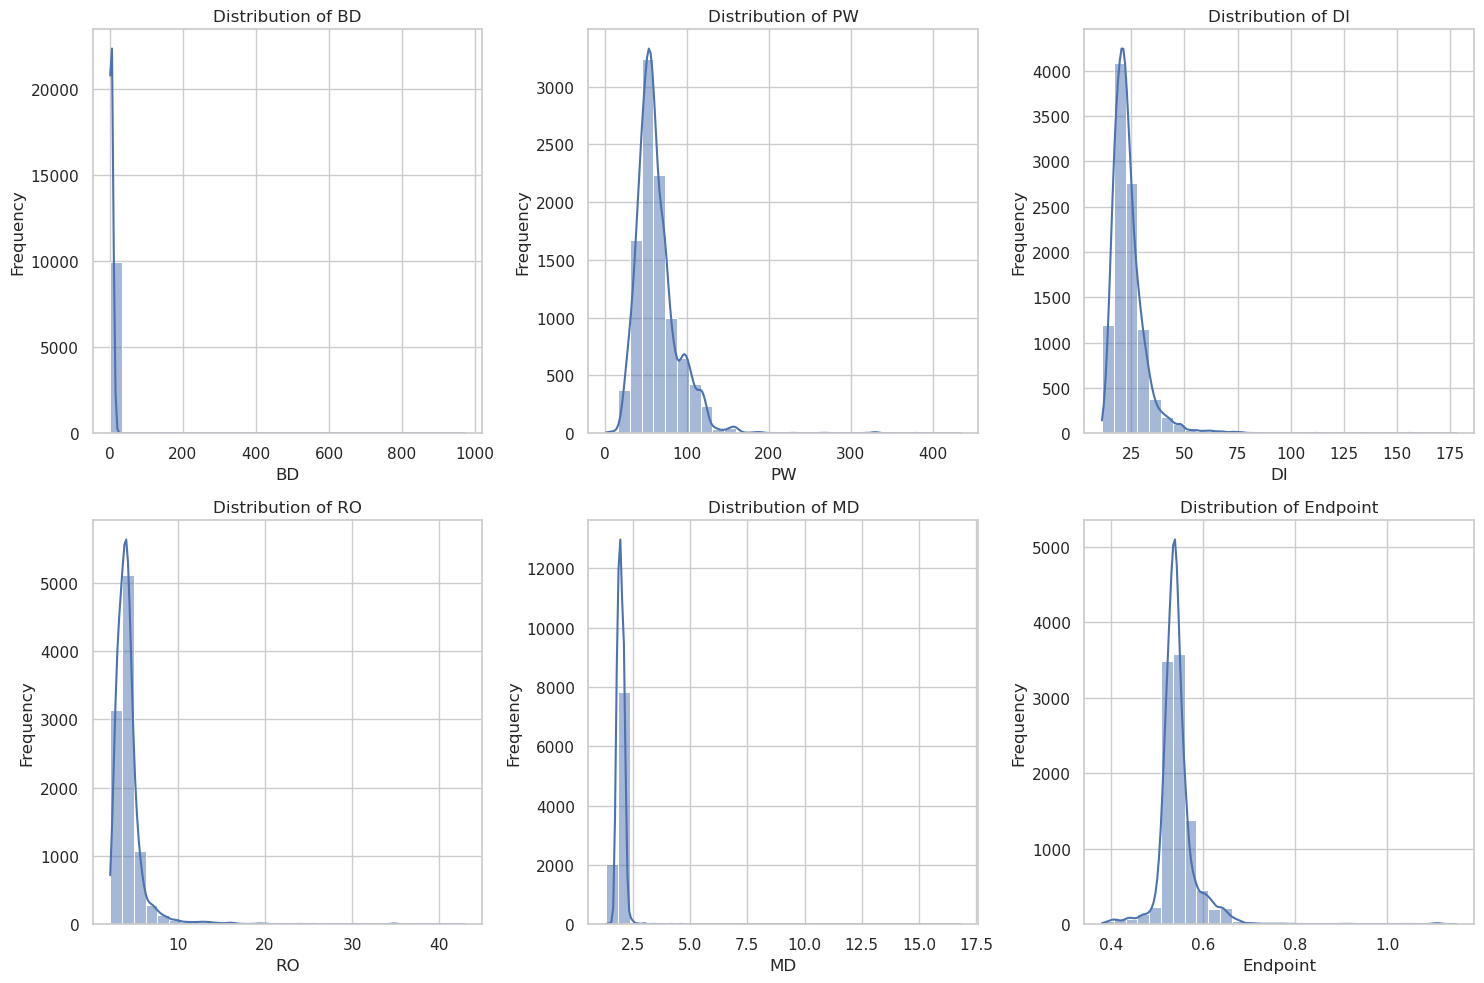

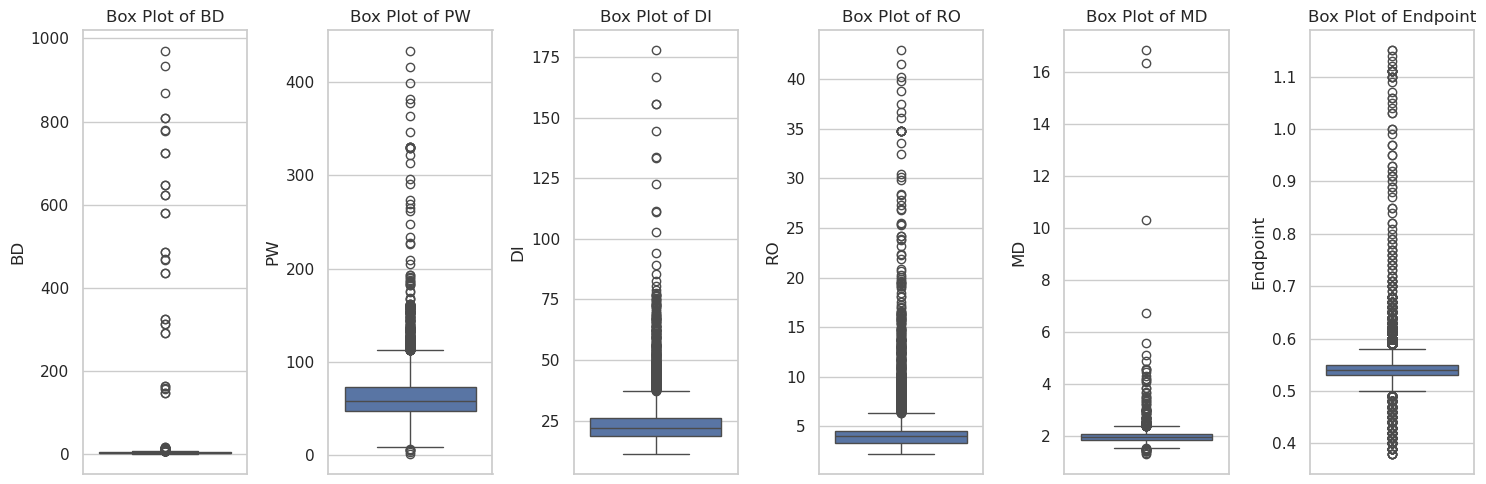

In [40]:
print("\n--- 3.1 时序数据可视化 (线图) ---")

# 确保这里的数值列与您的实际数据列名匹配
numerical_cols_for_plot = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

plt.figure(figsize=(18, len(numerical_cols_for_plot) * 3)) # 根据列数调整图高
for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(len(numerical_cols_for_plot), 1, i + 1)
    df[col].plot(title=f'Time Series Plot of {col}', legend=True)
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- 3.2 单变量分布分析 (直方图和箱线图) ---")
# 这里的数值列通常是连续的，如果 Endpint 是离散的，可以单独分析
numerical_cols_for_dist = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(2, 3, i + 1) # 2行3列布局
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(1, 6, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


--- 4.1 相关性分析 (数值型特征) ---

同时刻数值型特征相关矩阵：
                BD        PW        DI        RO        MD  Endpoint
BD        1.000000 -0.031538  0.000665 -0.019370 -0.032265 -0.000680
PW       -0.031538  1.000000 -0.008851  0.079346  0.126118  0.004278
DI        0.000665 -0.008851  1.000000  0.425481  0.110790  0.304773
RO       -0.019370  0.079346  0.425481  1.000000  0.184118  0.058998
MD       -0.032265  0.126118  0.110790  0.184118  1.000000  0.178764
Endpoint -0.000680  0.004278  0.304773  0.058998  0.178764  1.000000


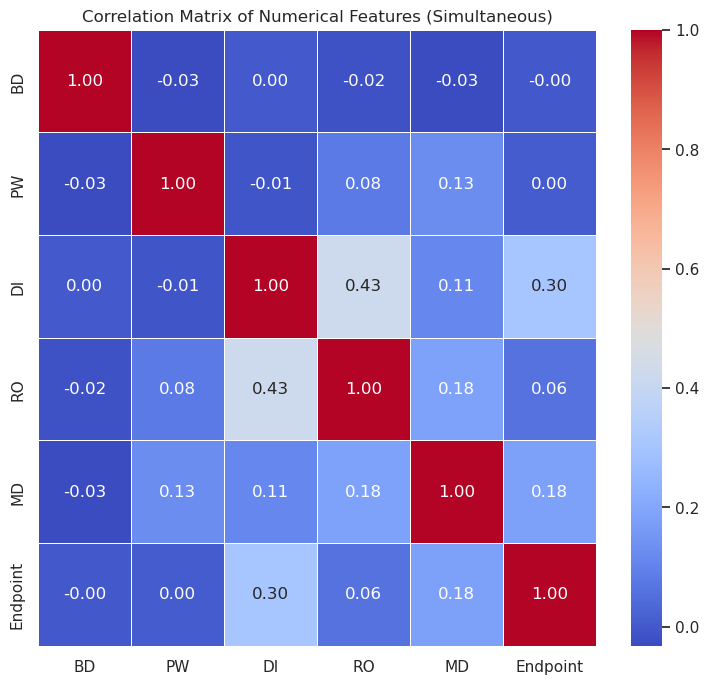


--- 4.3 序列分解 (趋势、季节性、残差) ---

尝试分解序列: BD (周期=24)
序列 'BD' 分解失败，可能数据不符合分解条件或周期 '24' 不合适: name 'seasonal_decompose' is not defined

尝试分解序列: PW (周期=24)
序列 'PW' 分解失败，可能数据不符合分解条件或周期 '24' 不合适: name 'seasonal_decompose' is not defined

尝试分解序列: DI (周期=24)
序列 'DI' 分解失败，可能数据不符合分解条件或周期 '24' 不合适: name 'seasonal_decompose' is not defined

尝试分解序列: RO (周期=24)
序列 'RO' 分解失败，可能数据不符合分解条件或周期 '24' 不合适: name 'seasonal_decompose' is not defined

尝试分解序列: MD (周期=24)
序列 'MD' 分解失败，可能数据不符合分解条件或周期 '24' 不合适: name 'seasonal_decompose' is not defined

尝试分解序列: Endpoint (周期=24)
序列 'Endpoint' 分解失败，可能数据不符合分解条件或周期 '24' 不合适: name 'seasonal_decompose' is not defined


In [41]:
print("\n--- 4.1 相关性分析 (数值型特征) ---")

# 确保这里的数值列与您的实际数据列名匹配
numerical_cols_for_corr = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

correlation_matrix = df[numerical_cols_for_corr].corr()
print("\n同时刻数值型特征相关矩阵：")
print(correlation_matrix)

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Simultaneous)')
plt.show()

# # 时序交叉相关 (Cross-Correlation)
# from statsmodels.graphics.tsaplots import plot_ccf

# print("\n--- 4.2 交叉相关函数 (Cross-Correlation Function - CCF) ---")
# # 您可以根据兴趣选择任意两列进行 CCF 分析
# # 示例：BD 与 PW 的交叉相关，看看 BD 变化是否滞后于 PW 或反之
# # 假设 max_lag 根据您的数据频率和业务含义来定，例如 24 表示看24个时间步的滞后
# max_lag = min(len(df) // 4, 100) # 取序列长度的1/4或100，以防数据太短
# if max_lag < 5: # 如果数据非常短，可能不适合做CCF
#     print("数据序列过短，可能不适合进行交叉相关分析。")
# else:
#     # 示例：BD 和 PW 之间的交叉相关
#     if 'BD' in df.columns and 'PW' in df.columns:
#         plt.figure(figsize=(12, 5))
#         plot_ccf(df['BD'], df['PW'], lags=max_lag)
#         plt.title(f'Cross-Correlation Function (BD vs PW) up to {max_lag} lags')
#         plt.xlabel('Lag')
#         plt.ylabel('Cross-Correlation')
#         plt.grid(True)
#         plt.show()
#     else:
#         print("未找到 'BD' 或 'PW' 列，跳过交叉相关分析示例。")

print("\n--- 4.3 序列分解 (趋势、季节性、残差) ---")
# 针对您认为可能存在趋势和季节性的数值列进行分解
# 您需要根据数据的时间频率（例如：小时、天、周）来设置 `period` 参数。
# 如果是小时数据，周期可以设置为 24 (日周期), 24*7=168 (周周期) 等
# 假设 'BD' 列有明显的周期性，周期为 `your_period`
your_period = 24 # <--- **请根据您的数据实际周期调整此值** (例如，如果数据是每小时一次，且您认为有日周期性，则设置为 24)

for col in numerical_cols_for_plot:
    if df[col].isnull().sum() == 0 and len(df[col]) >= 2 * your_period: # 确保无缺失值且数据长度足够分解
        try:
            print(f"\n尝试分解序列: {col} (周期={your_period})")
            decomposition = seasonal_decompose(df[col], model='additive', period=your_period)
            fig = decomposition.plot()
            fig.set_size_inches(12, 8)
            fig.suptitle(f'Time Series Decomposition of {col} (Period={your_period})', y=1.02)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"序列 '{col}' 分解失败，可能数据不符合分解条件或周期 '{your_period}' 不合适: {e}")
    else:
        print(f"序列 '{col}' 存在缺失值或长度不足，无法进行季节性分解。请先处理缺失值或调整周期。")


--- 开始异常值检测与插值处理 ---

处理列: 'BD'
  - 发现 223 个异常值（在 -0.66 到 8.09 范围之外）。


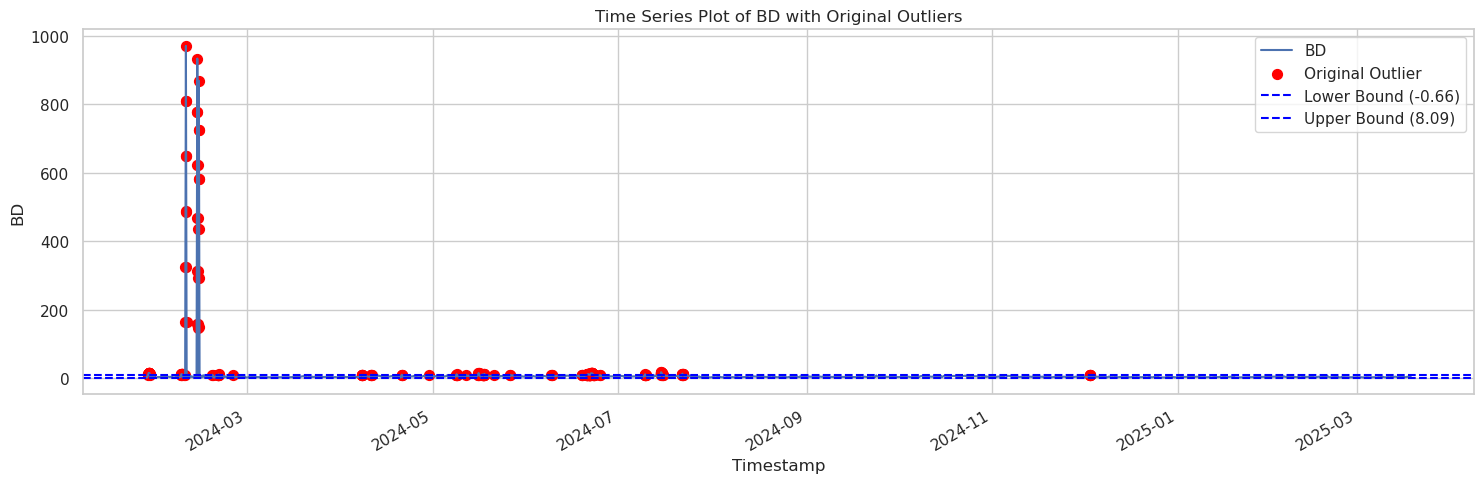

  - 已将 223 个异常值替换为 NaN。
  - 列 'BD' 当前缺失值数量: 223
  - 已使用线性插值填充 NaN。
  - 列 'BD' 最终缺失值数量: 0


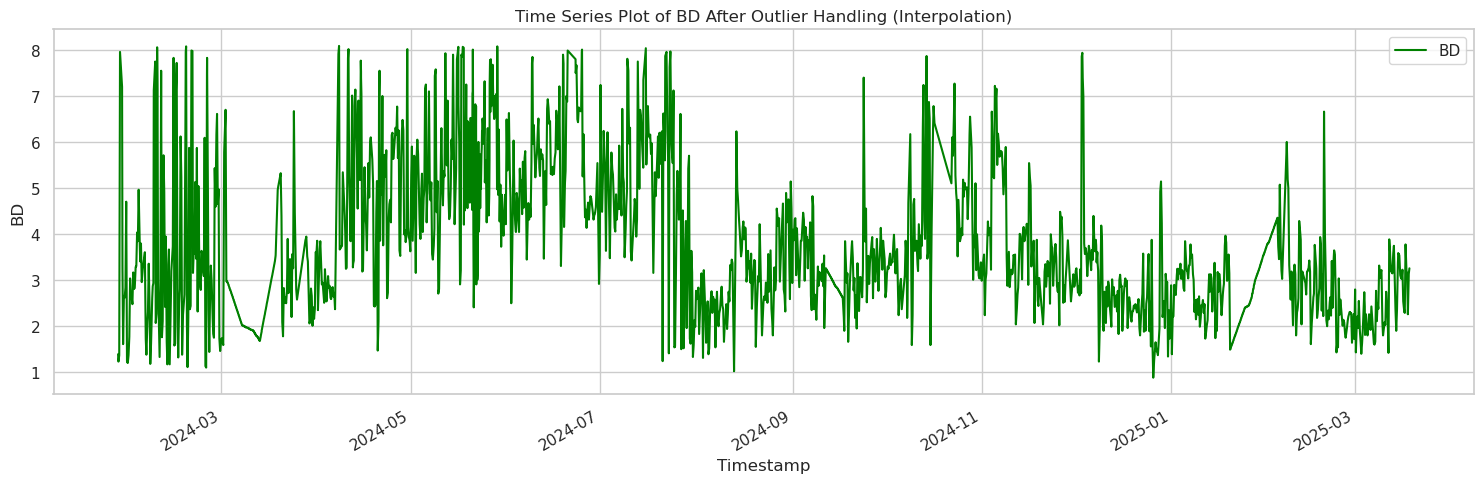


处理列: 'PW'
  - 发现 499 个异常值（在 7.61 到 112.71 范围之外）。


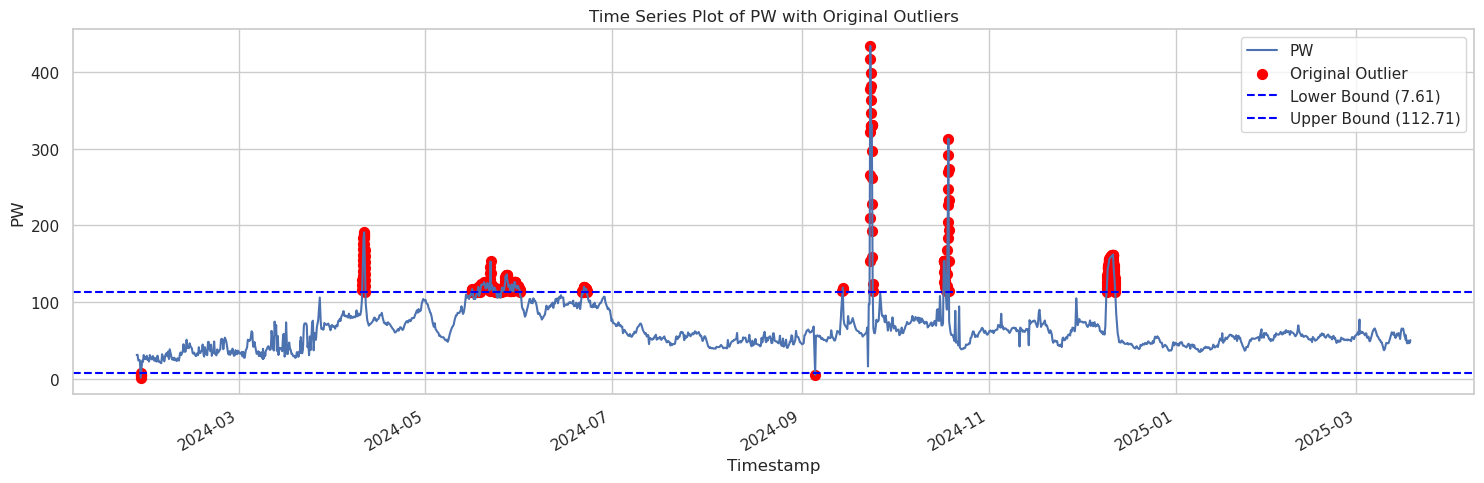

  - 已将 499 个异常值替换为 NaN。
  - 列 'PW' 当前缺失值数量: 499
  - 已使用线性插值填充 NaN。
  - 列 'PW' 最终缺失值数量: 0


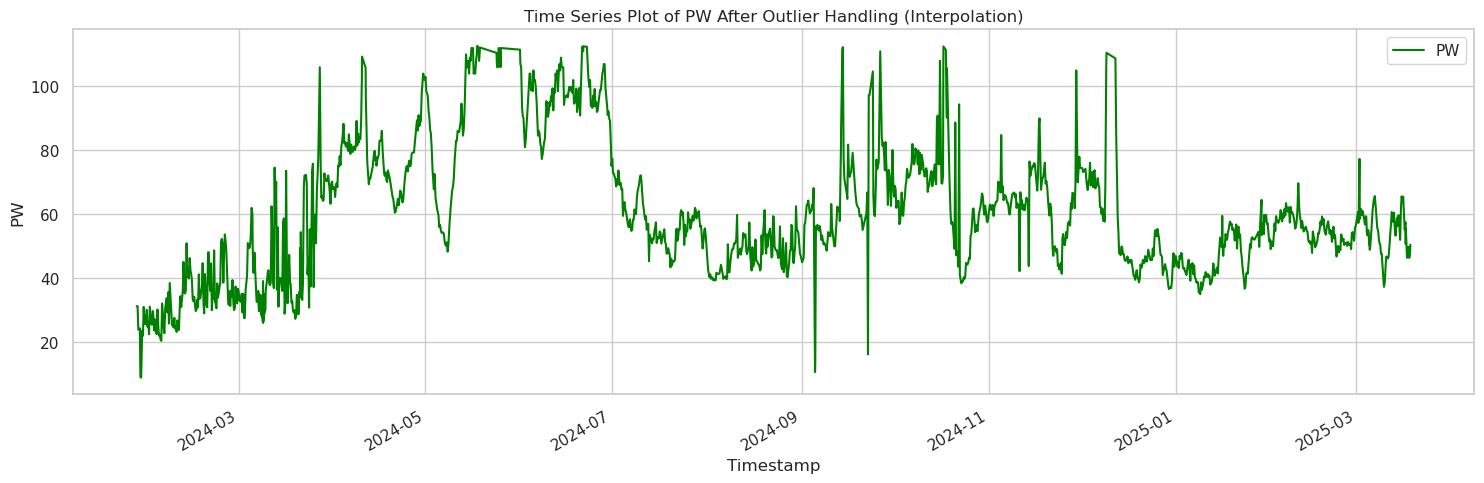


处理列: 'DI'
  - 发现 498 个异常值（在 7.68 到 37.36 范围之外）。


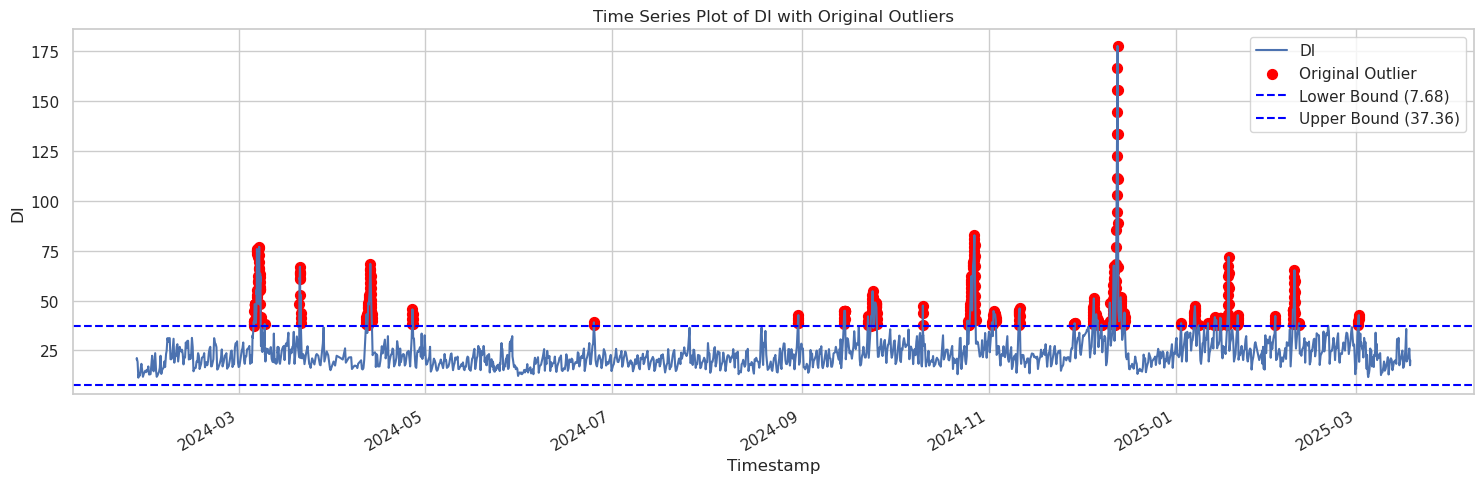

  - 已将 498 个异常值替换为 NaN。
  - 列 'DI' 当前缺失值数量: 498
  - 已使用线性插值填充 NaN。
  - 列 'DI' 最终缺失值数量: 0


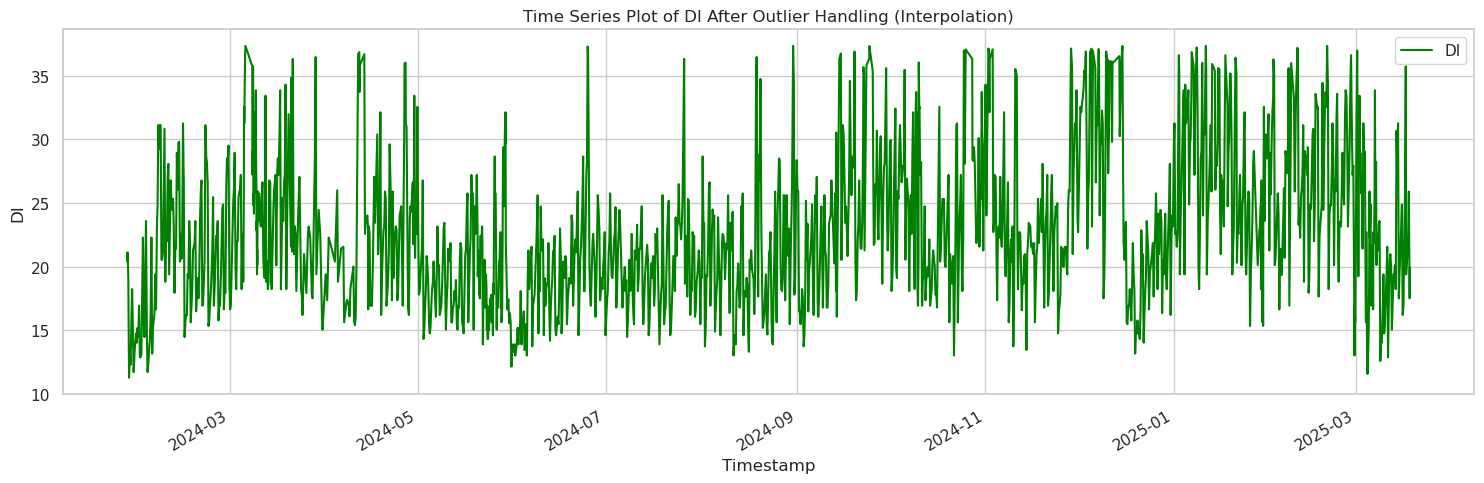


处理列: 'RO'
  - 发现 646 个异常值（在 1.54 到 6.39 范围之外）。


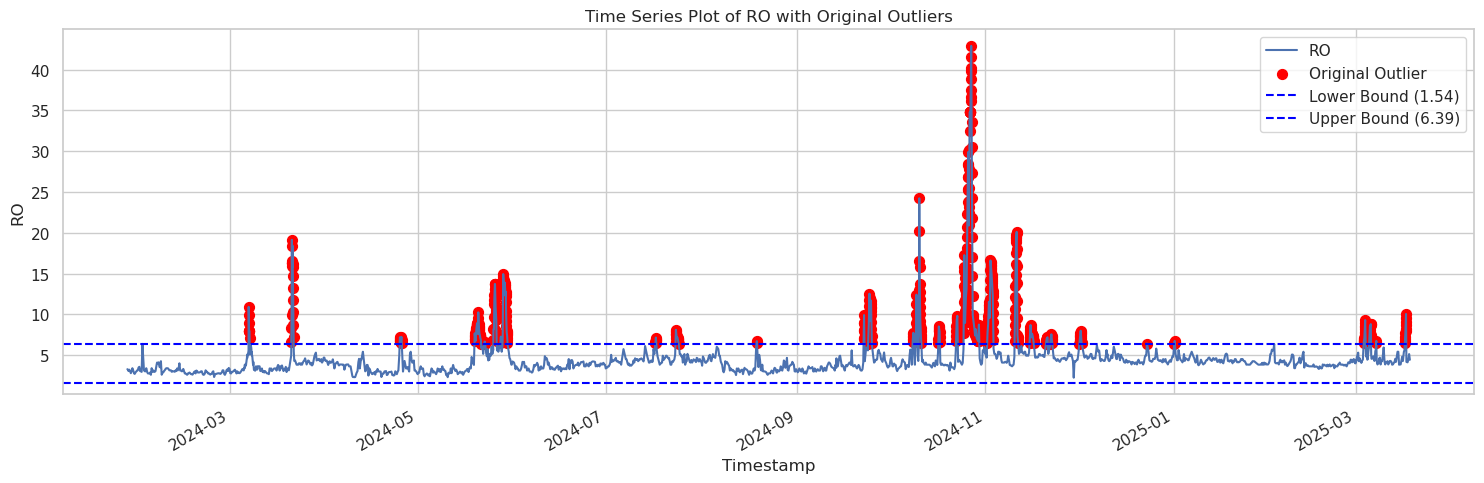

  - 已将 646 个异常值替换为 NaN。
  - 列 'RO' 当前缺失值数量: 646
  - 已使用线性插值填充 NaN。
  - 列 'RO' 最终缺失值数量: 0


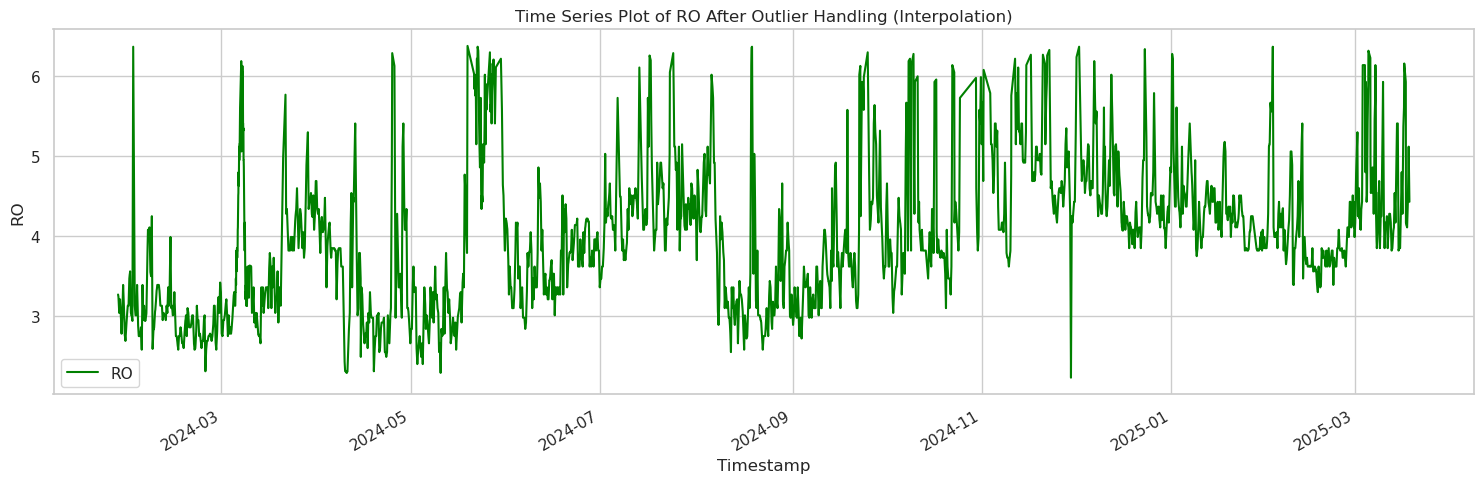


处理列: 'MD'
  - 发现 119 个异常值（在 1.56 到 2.40 范围之外）。


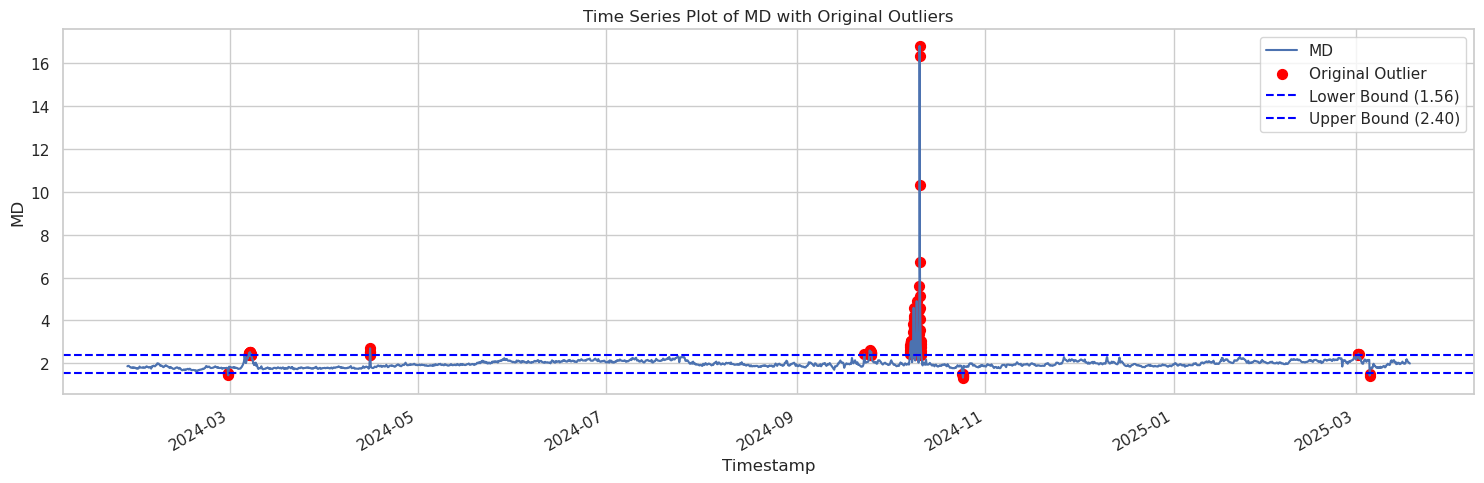

  - 已将 119 个异常值替换为 NaN。
  - 列 'MD' 当前缺失值数量: 119
  - 已使用线性插值填充 NaN。
  - 列 'MD' 最终缺失值数量: 0


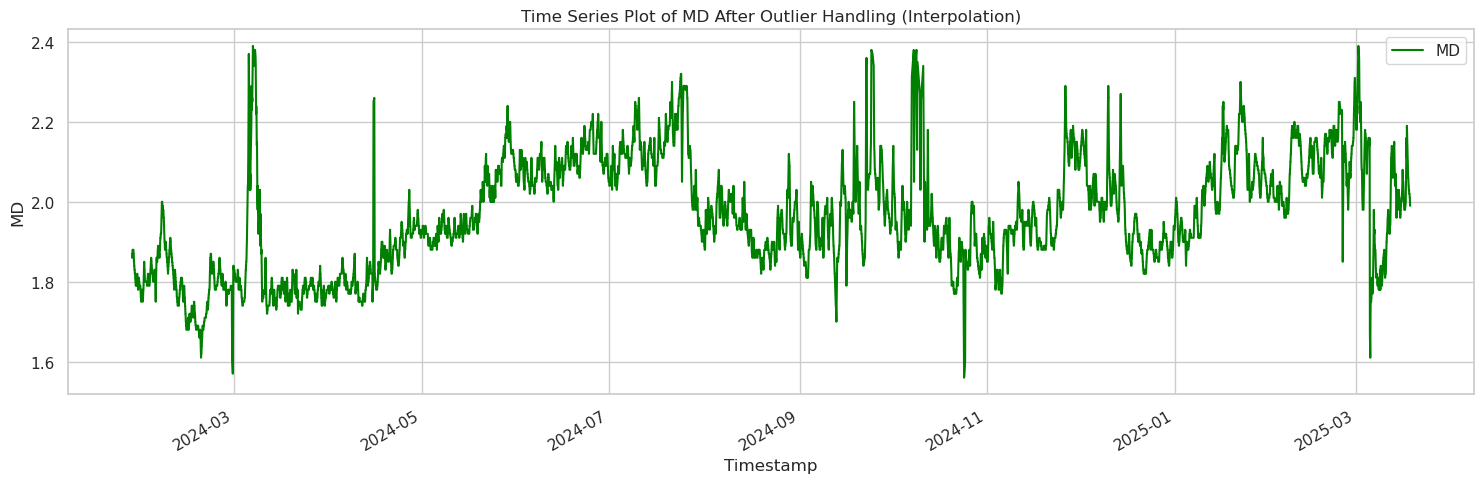


--- 异常值检测与插值处理完成 ---

处理后的数据头部：
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2024-01-27 18:00:00  1.38  31.25  20.42  3.27  1.86      0.55
2024-01-27 19:00:00  1.33  31.25  21.12  3.26  1.87      0.55
2024-01-27 20:00:00  1.27  31.25  20.81  3.25  1.87      0.55
2024-01-27 21:00:00  1.22  31.25  20.49  3.24  1.87      0.55
2024-01-27 22:00:00  1.24  31.25  20.18  3.21  1.88      0.55

处理后的数据缺失值检查：
BD          0
PW          0
DI          0
RO          0
MD          0
Endpoint    0
dtype: int64


In [42]:
# 定义需要进行异常值检测和处理的列
columns_to_check = ['BD', 'PW', 'DI', 'RO', 'MD']

print("\n--- 开始异常值检测与插值处理 ---")

for col in columns_to_check:
    print(f"\n处理列: '{col}'")

    # 1. 计算 IQR 上下界
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. 识别异常值
    outliers_idx = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    
    if not outliers_idx.empty:
        print(f"  - 发现 {len(outliers_idx)} 个异常值（在 {lower_bound:.2f} 到 {upper_bound:.2f} 范围之外）。")

        # 3. 可视化原始异常值（处理前）
        plt.figure(figsize=(15, 5))
        df[col].plot(title=f'Time Series Plot of {col} with Original Outliers', legend=True)
        plt.scatter(outliers_idx, df.loc[outliers_idx, col], color='red', marker='o', s=50, label='Original Outlier')
        plt.axhline(y=lower_bound, color='blue', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
        plt.axhline(y=upper_bound, color='blue', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
        plt.legend()
        plt.grid(True)
        plt.xlabel('Timestamp')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

        # 4. 将异常值替换为 NaN
        df.loc[outliers_idx, col] = np.nan
        print(f"  - 已将 {len(outliers_idx)} 个异常值替换为 NaN。")
        print(f"  - 列 '{col}' 当前缺失值数量: {df[col].isnull().sum()}")

        # 5. 使用线性插值填充 NaN
        df[col].interpolate(method='linear', inplace=True)
        print(f"  - 已使用线性插值填充 NaN。")

        # 6. 兜底处理：填充插值后可能的序列开头或结尾的 NaN
        df[col].fillna(method='ffill', inplace=True)
        df[col].fillna(method='bfill', inplace=True)
        
        print(f"  - 列 '{col}' 最终缺失值数量: {df[col].isnull().sum()}")

        # 7. 可视化处理后的序列
        plt.figure(figsize=(15, 5))
        df[col].plot(title=f'Time Series Plot of {col} After Outlier Handling (Interpolation)', legend=True, color='green')
        plt.grid(True)
        plt.xlabel('Timestamp')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

    else:
        print(f"  - 列 '{col}' 未发现明显的 IQR 异常值。")

print("\n--- 异常值检测与插值处理完成 ---")
print("\n处理后的数据头部：")
print(df.head())
print("\n处理后的数据缺失值检查：")
print(df.isnull().sum())

# output_filename='project/TOC_Warning_System/data/processed/TOC_dataset.xlsx'
# df.to_excel(output_filename, index=True)  
# print(f"\n处理后的数据已另存为: {output_filename}")

In [44]:
column_to_filter = 'Endpoint'

upper_bound = 0.75
lower_bound = 0.5

# ==================== 2. 数据处理核心逻辑 (通常无需修改) ====================

print(f"\n开始处理 'Endpoint' 列的异常值...")
print(f"异常值定义: > {upper_bound} 或 < {lower_bound}")

# --- 阶段1: 识别并替换异常值为 NaN ---

# 创建一个布尔条件的"掩码" (mask)，True代表是异常值
outlier_condition = (df['Endpoint'] > upper_bound) | (df['Endpoint'] < lower_bound)

# 在替换前，先计算一下找到了多少个异常值
outlier_count = outlier_condition.sum()

if outlier_count > 0:
    print(f"已找到 {outlier_count} 个异常值。正在将其替换为NaN...")
    # 使用 .loc 根据条件来安全地赋值
    df.loc[outlier_condition, 'Endpoint'] = np.nan
else:
    print("在 'Endpoint' 列中未找到需要替换的异常值。")

# --- 阶段2: 使用插值法填充NaN ---

# 检查数据中现在是否存在NaN值（也就是我们刚刚创建的）
nan_count = df['Endpoint'].isnull().sum()

if nan_count > 0:
    print(f"\n数据中存在 {nan_count} 个NaN值。正在使用线性插值法进行填充...")
    
    # 使用 'linear' 方法进行插值。这对于时序数据是一种很好的默认选择。
    # inplace=True 表示直接在原DataFrame上修改，不创建副本。
    df['Endpoint'].interpolate(method='linear', inplace=True)
    
    # 检查是否所有NaN都已填充
    remaining_nans = df['Endpoint'].isnull().sum()
    if remaining_nans == 0:
        print("所有NaN值已成功填充。")
    else:
        # 备注: 如果数据开头或结尾存在NaN，interpolate可能无法填充它们
        print(f"警告: 填充后仍有 {remaining_nans} 个NaN值未被处理（可能位于数据开头或结尾）。")
else:
    print("\n数据中没有需要插值的NaN值。")




开始处理 'Endpoint' 列的异常值...
异常值定义: > 0.75 或 < 0.5
已找到 453 个异常值。正在将其替换为NaN...

数据中存在 453 个NaN值。正在使用线性插值法进行填充...
所有NaN值已成功填充。


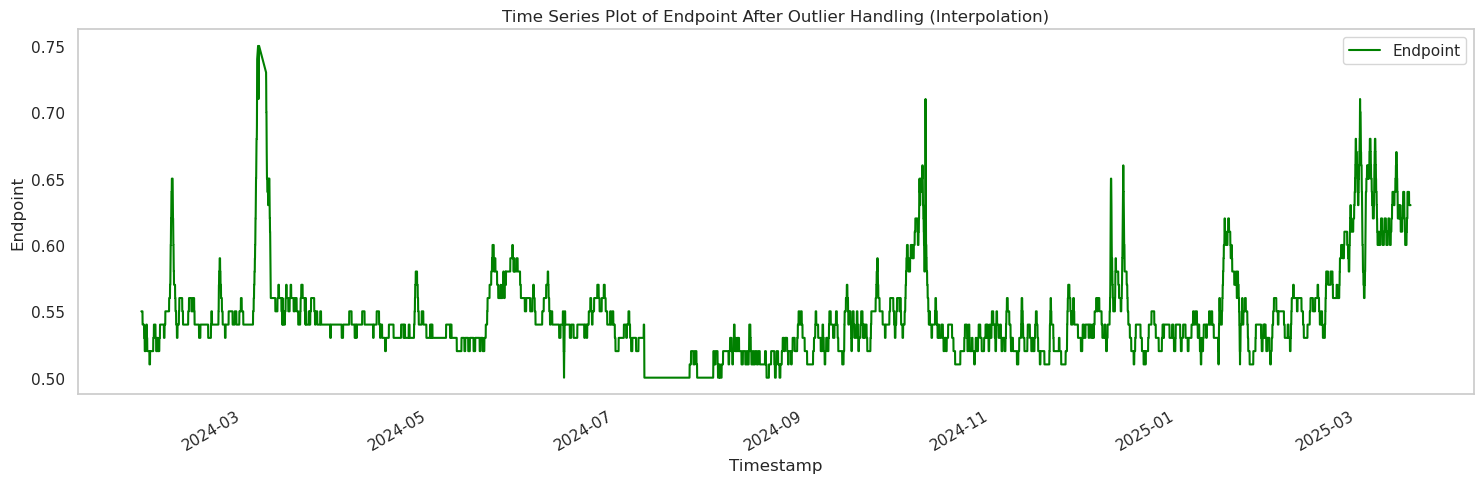

In [46]:
columns = ['Endpoint']

for col in columns:
    plt.figure(figsize=(15, 5))
    df[col].plot(title=f'Time Series Plot of {col} After Outlier Handling (Interpolation)', legend=True, color='green')
    plt.grid(False)
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [47]:
cols_to_format = [col for col in df.columns if col != 'timestamp']
# 对这些列应用.round(2)
df[cols_to_format] = df[cols_to_format].round(2)
print("格式化完成。")

# 将筛选后的DataFrame保存到新的CSV文件
output_filename='/home/hmd24/project/TOC_Warning_System/data/processed/TOC_dataset_shift_treat.csv'
df.to_csv(output_filename, index=True)  
print(f"\n处理后的数据已另存为: {output_filename}")

格式化完成。

处理后的数据已另存为: /home/hmd24/project/TOC_Warning_System/data/processed/TOC_dataset_shift_treat.csv
